In [1]:
import pyNN.spiNNaker as sim
from pyNN.utility.plotting import Figure, Panel
import matplotlib.pyplot as plt

In [2]:
sim.setup(timestep=1.0)
sim.set_number_of_neurons_per_core(sim.IF_curr_exp, 100)

pop = sim.Population(2, sim.IF_curr_exp(), label="pop")
input = sim.Population(2, sim.SpikeSourceArray([[0.0], [1.0]]), label="input")

input_proj = sim.Projection(input, pop, sim.OneToOneConnector(
), synapse_type=sim.StaticSynapse(weight=5.0, delay=2))

pop.record(["spikes", "v"])

simtime = 10

2022-03-14 16:33:27 INFO: Read cfg files: /home/takeshi/.pyenv/versions/3.8.9/envs/spinnaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/takeshi/.pyenv/versions/3.8.9/envs/spinnaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/takeshi/.spynnaker.cfg
2022-03-14 16:33:27 INFO: Will search these locations for binaries: /home/takeshi/.pyenv/versions/3.8.9/envs/spinnaker/lib/python3.8/site-packages/spinn_front_end_common/common_model_binaries : /home/takeshi/.pyenv/versions/3.8.9/envs/spinnaker/lib/python3.8/site-packages/spynnaker/pyNN/model_binaries
2022-03-14 16:33:27 INFO: Setting time scale factor to 10.
2022-03-14 16:33:27 INFO: Setting machine time step to 1000 micro-seconds.


['/home/takeshi/.pyenv/versions/3.8.9/envs/spinnaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/takeshi/.pyenv/versions/3.8.9/envs/spinnaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/takeshi/.spynnaker.cfg']


In [3]:
sim.run(simtime)

2022-03-14 16:33:39 INFO: [Reports]write_board_chip_report has been set to False as using virtual boards
2022-03-14 16:33:39 INFO: Starting execution process
2022-03-14 16:33:39 INFO: Simulating for 10 1.0ms timesteps using a hardware timestep of 10000us
2022-03-14 16:33:39 INFO: Created a virtual machine which has 864 cores and 120.0 links
2022-03-14 16:33:39 INFO: Time 0:00:00.003432 taken by VirtualMachineGenerator
Preallocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2022-03-14 16:33:39 INFO: Time 0:00:00.018756 taken by PreAllocateResourcesForExtraMonitorSupport
2022-03-14 16:33:39 INFO: Time 0:00:00.000170 taken by NetworkSpecificationReport
Allocating virtual identifiers
|0%                          50%                         100%|
2022-03-14 16:33:39 INFO: Time 0:00:00.018983 taken by MallocBasedChipIDAllocator
Adding Splitter selectors where appropriate
|0%                          50%                        

10.0

In [4]:
v = pop.get_data("v")
spikes = pop.get_data("spikes")

print(v.segments[0].filter(name="v"))
print(spikes.segments[0].spiketrains)

2022-03-14 16:33:47 WARNING: The simulation is using a virtual machine and so has not truly ran, hence the list will be empty
2022-03-14 16:33:47 WARNING: Getting data on a whole population when selective recording is active will result in only the requested neurons being returned in numerical order and without repeats.
2022-03-14 16:33:47 WARNING: The simulation is using a virtual machine and so has not truly ran, hence the list will be empty


[<AnalogSignal(array([], shape=(0, 3), dtype=float64) * mV, [0.0 ms, 0.0 ms], sampling rate: 1.0 1/ms)>]
[<SpikeTrain(array([], dtype=float64) * ms, [0.0 ms, 10.0 ms])>, <SpikeTrain(array([], dtype=float64) * ms, [0.0 ms, 10.0 ms])>]


2022-03-14 16:33:50 WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


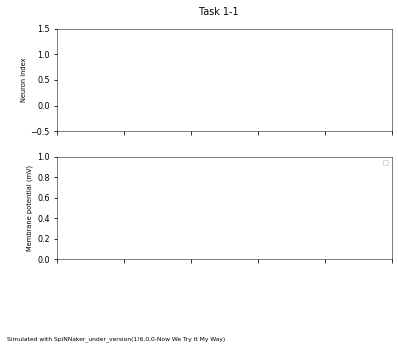

In [5]:
figure_filename = "results.png"
figure = Figure(
    Panel(spikes.segments[0].spiketrains, yticks=True,
          markersize=0.2, xlim=(0, simtime)),
    Panel(v.segments[0].filter(name="v")[0], ylabel="Membrane potential (mV)", data_labels=[
          pop.label], yticks=True, xlim=(0, simtime)),
    title="Task 1-1",
    annotations="Simulated with {}".format(sim.name())
)
figure.save(figure_filename)

In [6]:
sim.end()